In [1]:
# need to install networkx, stemming
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import string
import numpy as np
from stemming.porter2 import stem
from scipy.linalg import *

In [2]:
# read file and save as a list
sentences = []
with open('test2.txt', 'rb') as f:
    for line in f:
        sentences.append(line.strip())

In [3]:
# remove punctuations
for i in range(len(sentences)):
    for c in string.punctuation:
        sentences[i]= sentences[i].replace(c,"")

In [4]:
# generate lexicon of stem words and their freq
lexicon = {}
word_counter=0
for line in sentences:
    word = line.split()
    for item in word:
        lexicon[stem(item)] = word_counter
    word_counter += 1

In [5]:
# compute sparse matrix
S = np.zeros(len(sentences) * len(lexicon), dtype=np.dtype('Float64')).reshape(len(sentences), len(lexicon))

for i in range(len(sentences)):
    for w in [stem(word) for word in sentences[i].split()]:
        S[i, lexicon[w]] = 1

In [11]:
S.shape

(12, 200)

In [12]:
# compute numerator of the cosine similarity
P = np.dot(S, S.transpose())

In [13]:
#zero out the diagonal elements
P -= np.diag(np.diag(P))

In [14]:
#denominator of the cosine similarity
D = np.array([norm(x) for x in S])
DD = np.dot(D, D.transpose())
# the cosine similarity
P = np.divide(P, DD)

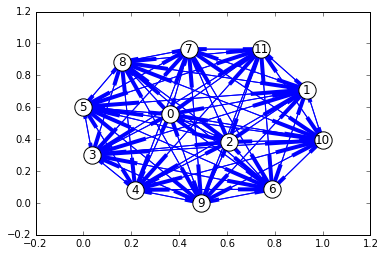

In [15]:
# generate graph
G = nx.DiGraph(np.nan_to_num(P)) 
# plot network
pos=nx.spring_layout(G) 
nx.draw_networkx_nodes(G,pos,node_size=300, node_color='w') 
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [16]:
# run pagerank 
pagerank = nx.pagerank(G)
pagerank

{0: 0.11166606060721188,
 1: 0.09269270415835261,
 2: 0.10961218759589778,
 3: 0.09279532705977807,
 4: 0.09488189687339281,
 5: 0.08234489249447828,
 6: 0.08444987615035963,
 7: 0.08029750264235853,
 8: 0.08234997901410543,
 9: 0.07612448816459112,
 10: 0.057070011248506955,
 11: 0.03571507399096675}

In [17]:
# every node's importance
order = sorted(pagerank, key=pagerank.get, reverse=True)
sorted(pagerank, key=pagerank.get, reverse=True)

[0, 2, 4, 3, 1, 6, 8, 5, 7, 9, 10, 11]

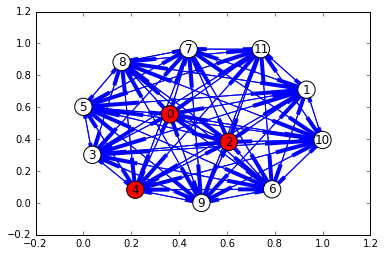

In [18]:
values = []
for node in G.nodes():
    if node in order[0:3]:
        values += 'r'
    else:
        values += 'w'
nx.draw_networkx_nodes(G,pos,node_size=300, node_color=values) 
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [16]:
# top three sentences as follows

In [20]:
for node in G.nodes():
    if node in order[0:3]:
        print sentences[node] + '\n'

Boeing Co has signed deals to sell 300 aircraft to three Chinese firms and set up an aircraft plant in China becoming the first US firm to clinch a business tieup in the country since Chinese president Xi Jinping began a US state visit the official Xinhua news agency said

Chinas ICBC Financial Leasing Co a unit of the Industrial and Commercial Bank of China on Wednesday separately confirmed it will buy 30 of Boeings 737800 jets worth 288 billion at list prices

Boeing which is locked in a fierce battle for plane orders with European rival Airbus will build its first aircraft completion plant outside the United States in China in order to gain a foothold in that important market say industry observers

